# Notebook 02 — Transformations That Matter

Raw macro levels are often misleading.

This notebook shows why macro analysis focuses on:
- rates of change
- relative positioning
- real vs nominal measures

These transformations form the foundation for all downstream analysis.

In [1]:
# imports

import pandas as pd
import matplotlib.pyplot as plt

import sys
from pathlib import Path

# add project root to python path
PROJECT_ROOT = Path.cwd().parent
sys.path.append(str(PROJECT_ROOT))

# data directories
DATA_RAW = PROJECT_ROOT / "data" / "raw"
DATA_PROCESSED = PROJECT_ROOT / "data" / "processed"
DATA_OUTPUTS = PROJECT_ROOT / "data" / "outputs"

from macro_utils.transforms import (
    yoy, mom, qoq,
    zscore, index_to_100, real_adjust
)

pd.set_option("display.width", 140)

In [2]:
# load data

monthly = pd.read_csv(
    DATA_RAW / "fred_monthly.csv",
    index_col=0,
    parse_dates=True
)

monthly.head()

,GDP,CPI,UNRATE,FEDFUNDS
DATE,,,,
1990-01-31,5872.701,127.5,5.4,8.23
1990-02-28,5872.701,128.0,5.3,8.24
1990-03-31,5872.701,128.6,5.2,8.28
1990-04-30,5960.028,128.9,5.4,8.26
1990-05-31,5960.028,129.1,5.4,8.18


Absolute levels rarely tell a complete macro story.

Examples:
- GDP levels grow structurally over time
- CPI levels drift upward by construction
- Interest rate meaning depends on inflation context

Macro insight lives in *change*, not levels.

In [3]:
# YoY vs MoM

monthly["CPI_YoY"] = yoy(monthly["CPI"])
monthly["CPI_MoM"] = mom(monthly["CPI"])

monthly[["CPI", "CPI_YoY", "CPI_MoM"]].tail()

c:\Users\JR\OneDrive\Mini PC\FRED\macro_utils\transforms.py:5: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  return series.pct_change(periods) * 100
c:\Users\JR\OneDrive\Mini PC\FRED\macro_utils\transforms.py:8: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  return series.pct_change(1) * 100


,CPI,CPI_YoY,CPI_MoM
DATE,,,
2025-08-31,323.364,2.939220,0.382452
2025-09-30,324.368,3.022700,0.310486
2025-10-31,NaN,2.789925,0.000000
2025-11-30,325.031,2.711969,0.204397
2025-12-31,326.030,2.653312,0.307355


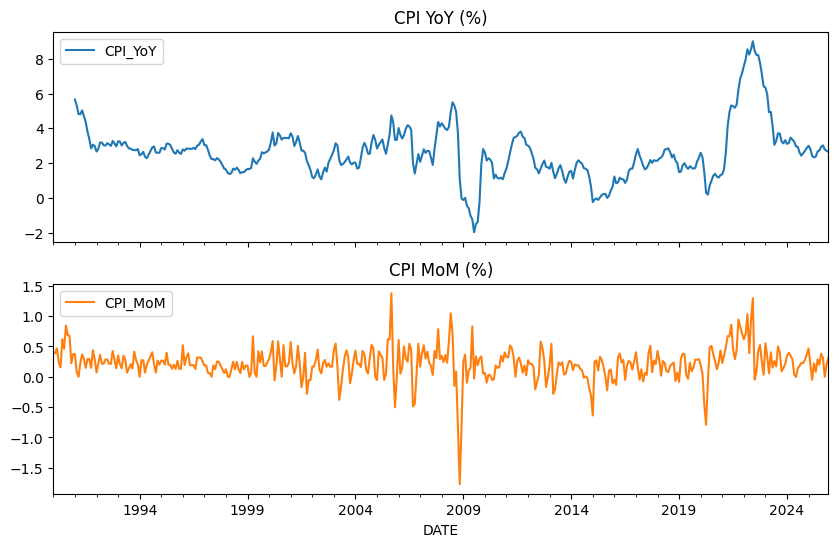

In [4]:
monthly[["CPI_YoY", "CPI_MoM"]].plot(
    subplots=True,
    figsize=(10, 6),
    title=["CPI YoY (%)", "CPI MoM (%)"]
)
plt.show()

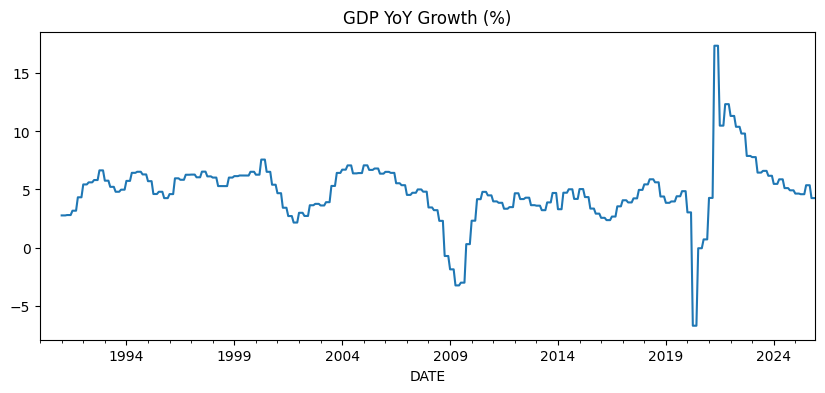

In [5]:
# growth example

monthly["GDP_YoY"] = yoy(monthly["GDP"])

monthly["GDP_YoY"].plot(
    figsize=(10, 4),
    title="GDP YoY Growth (%)"
)
plt.show()

Nominal values mix growth and inflation.

To understand purchasing power or real activity,
we must deflate nominal series.

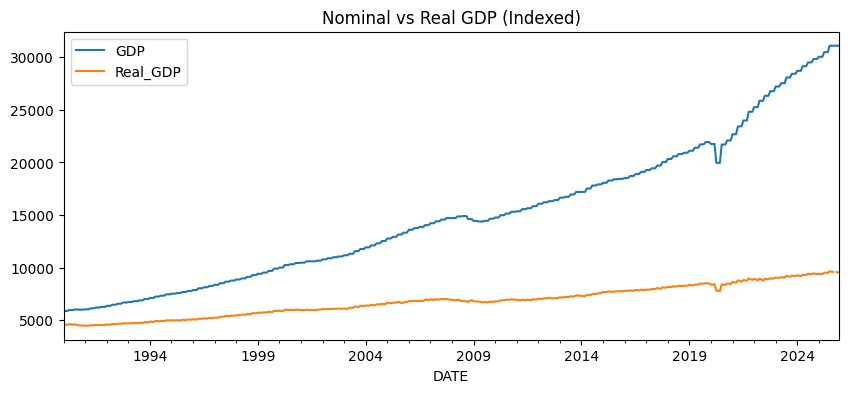

In [6]:
# real adjustment

monthly["Real_GDP"] = real_adjust(monthly["GDP"], monthly["CPI"])

monthly[["GDP", "Real_GDP"]].plot(
    figsize=(10, 4),
    title="Nominal vs Real GDP (Indexed)"
)
plt.show()

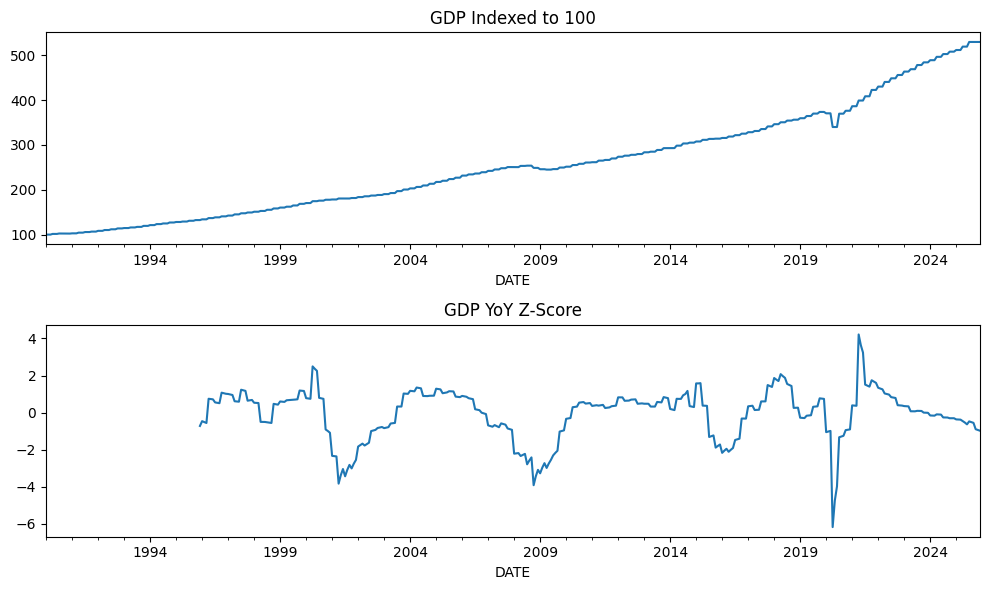

In [7]:
# indexing and z-scores

indexed = index_to_100(monthly["GDP"])
z = zscore(monthly["GDP_YoY"])

fig, ax = plt.subplots(2, 1, figsize=(10, 6))
indexed.plot(ax=ax[0], title="GDP Indexed to 100")
z.plot(ax=ax[1], title="GDP YoY Z-Score")
plt.tight_layout()
plt.show()